# **NLP Final Project - Sweep Analysis Appendix**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from sklearn import metrics
import scipy.stats as stats
from tqdm import tqdm
import pandas as pd
import numpy as np
import requests
import sklearn
import os

In [ ]:
BASE_METRIC = "accuracy_per_mean_user_and_bot"

## **Primary Research - New Language-Based Strategies**

### **Analyzing the Results**

#### **Choosing the Best Strategy**

In this section, we would like to cross-compare the results of the newly defined language-based strategies, and choose the best one.

First, after extracting the raw sweep results using the Weights & Biases API, let us load the received raw dataset below:

*Note that the raw dataset can be found in the project's GitHub repository using the following [link](https://github.com/dan-israeli/NLP-Course-Project/blob/main/primary%20research/sweeps/results/raw/raw_new_language_based_strategies_results.csv).

In [ ]:
df_raw = pd.read_csv("raw_new_language_based_strategies_results.csv")

Now, let us process the raw data by averaging the results of each experiment across the different seeds:

In [ ]:
cols_to_select = ["config_seed", "config_basic_nature", "config_simulation_user_improve"]
for col in df_raw.columns.values:
  if "Test_accuracy_per_mean_user_and_bot" in col:
    cols_to_select.append(col)

# remove epoch 0
cols_to_select.remove("ENV_Test_accuracy_per_mean_user_and_bot_epoch0")

filtered_df = df_raw[cols_to_select]

In [ ]:
# group by and average across the 3 seeds
grouped = filtered_df.groupby(["config_basic_nature", "config_simulation_user_improve"]).mean().drop("config_seed", axis=1)

grouped = grouped.rename(columns={col_name: int(col_name.split("epoch")[-1]) for col_name in grouped.columns.values})
df_processed = grouped[sorted(list(range(1, 21)))]
df_processed

1         2   \
config_basic_nature config_simulation_user_improve                       
17                  0.005                           0.794182  0.794527   
                    0.010                           0.790573  0.792576   
                    0.020                           0.778037  0.789655   
18                  0.005                           0.791897  0.786857   
                    0.010                           0.789147  0.789361   
                    0.020                           0.789157  0.790919   
19                  0.005                           0.790981  0.790132   
                    0.010                           0.782630  0.789902   
                    0.020                           0.789686  0.793199   
20                  0.005                           0.782232  0.786248   
                    0.010                           0.789372  0.795440   
                    0.020                           0.790193  0.789208   
21                  0.005                           0.791824  0.795297   
                    0.010                           0.783110  0.789510   
                    0.020                           0.787902  0.789724   
22                  0.005                           0.782401  0.788549   
                    0.010                           0.783947  0.792193   
                    0.020                           0.787246  0.787554   
23                  0.005                           0.792925  0.791648   
                    0.010                           0.790338  0.797200   
                    0.020                           0.792878  0.791335   

                                                          3         4   \
config_basic_nature config_simulation_user_improve                       
17                  0.005                           0.792465  0.791681   
                    0.010                           0.791893  0.793199   
                    0.020                           0.790774  0.794881   
18                  0.005                           0.796021  0.789765   
                    0.010                           0.794967  0.793077   
                    0.020                           0.794938  0.797190   
19                  0.005                           0.787275  0.795607   
                    0.010                           0.795485  0.778313   
                    0.020                           0.792810  0.796937   
20                  0.005                           0.790336  0.791131   
                    0.010                           0.792074  0.795250   
                    0.020                           0.790591  0.791550   
21                  0.005                           0.791135  0.797356   
                    0.010                           0.795133  0.797254   
                    0.020                           0.792012  0.790369   
22                  0.005                           0.793924  0.794626   
                    0.010                           0.792693  0.793395   
                    0.020                           0.791994  0.797249   
23                  0.005                           0.791435  0.792905   
                    0.010                           0.791254  0.795686   
                    0.020                           0.789219  0.793595   

                                                          5         6   \
config_basic_nature config_simulation_user_improve                       
17                  0.005                           0.796509  0.792527   
                    0.010                           0.789870  0.798838   
                    0.020                           0.791775  0.794808   
18                  0.005                           0.797158  0.797434   
                    0.010                           0.794237  0.792745   
                    0.020                           0.798189  0.796360   
19                  0.005                           0.795926

As we can see from the dataframe above, each newly defined strategy was tested with different improvement rates values.

Let us find the best fitting improvement rate for each such strategy:

In [ ]:
def plot_strategy_for_impr_rates(df, basic_nature, strat_name):
  marker_dict = {0.005: "o", 0.01: "^", 0.02: "s"}

  for improvement_rate in [0.005, 0.01, 0.02]:
    epochs = list(range(1, 21))
    accuracies = df.loc[basic_nature, improvement_rate].values
    plt.plot(epochs, accuracies, label=improvement_rate, marker=marker_dict[improvement_rate], markersize=5)

  plt.title(f"{strat_name} Strategy")
  plt.xticks([0, 5, 10, 15, 20])
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.legend(title="Imp. Rate")
  plt.show()

For the Strictly Positive strategy (basic nature 17):

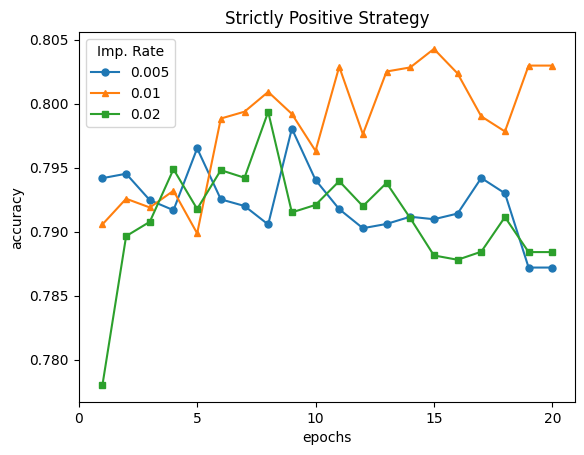

In [ ]:
plot_strategy_for_impr_rates(df_processed, basic_nature=17, strat_name="Strictly Positive")

As we can see, the best improvement rate for this strategy is **0.01**.

For the Strictly Negative strategy (basic nature 18):

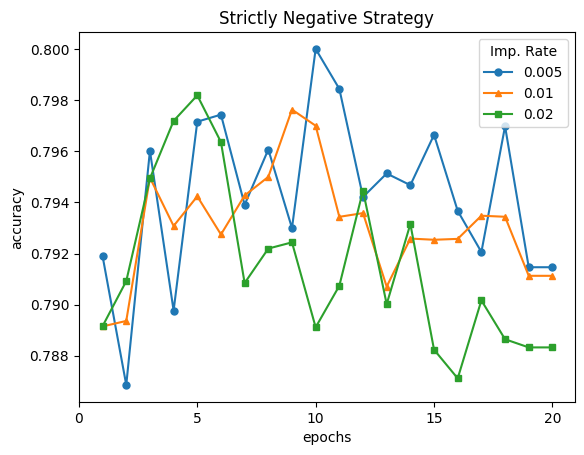

In [ ]:
plot_strategy_for_impr_rates(df_processed, basic_nature=18, strat_name="Strictly Negative")

As we can see, the best improvement rate for this strategy is **0.005**.

For the Baseline strategy (basic nature 19):

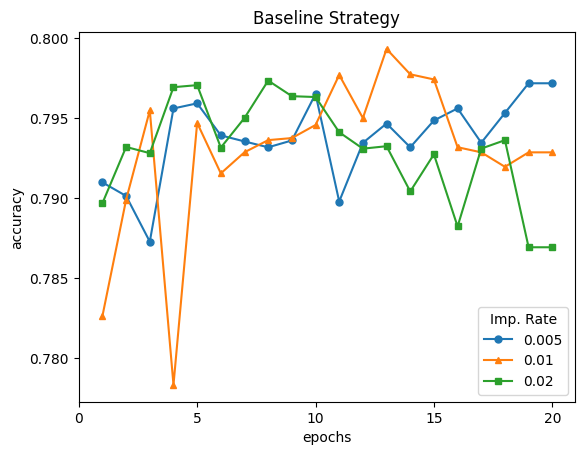

In [ ]:
plot_strategy_for_impr_rates(df_processed, basic_nature=19, strat_name="Baseline")

As we can see, the best improvement rate for this strategy is **0.005**.

For the No Orientation strategy (basic
nature 20):

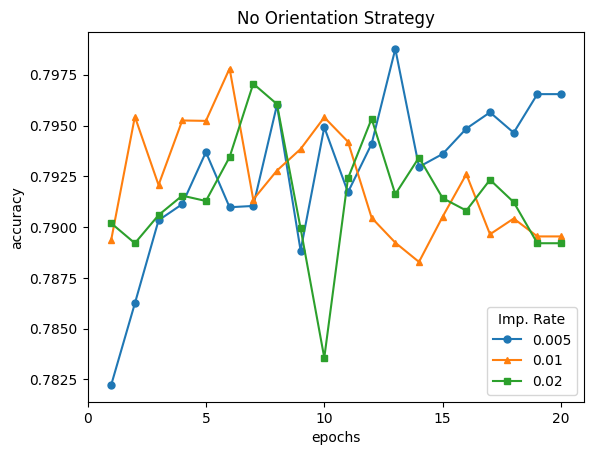

In [ ]:
plot_strategy_for_impr_rates(df_processed, basic_nature=20, strat_name="No Orientation")

As we can see, the best improvement rate for this strategy is **0.005**.

For the No Orientation Extended strategy (basic nature 21):

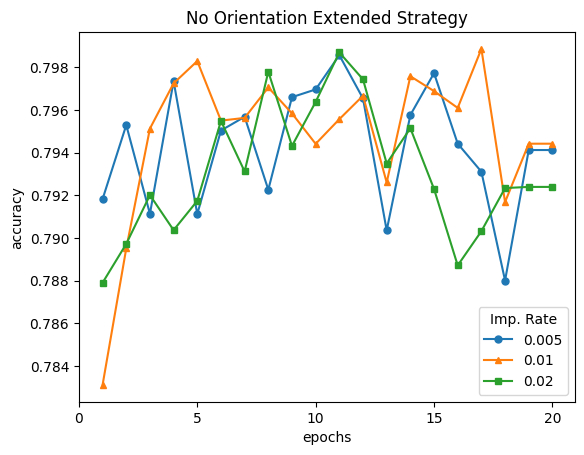

In [ ]:
plot_strategy_for_impr_rates(df_processed, basic_nature=21, strat_name="No Orientation Extended")

As we can see, the best improvement rate for this strategy is **0.01**.

For the Positive Oriented strategy (basic nature 22):

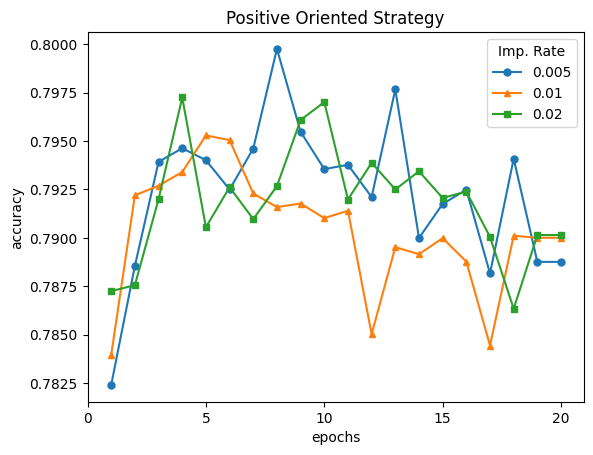

In [ ]:
plot_strategy_for_impr_rates(df_processed, basic_nature=22, strat_name="Positive Oriented")

As we can see, the best improvement rate for this strategy is **0.005**.

For the Negative Oriented strategy (basic nature 23):

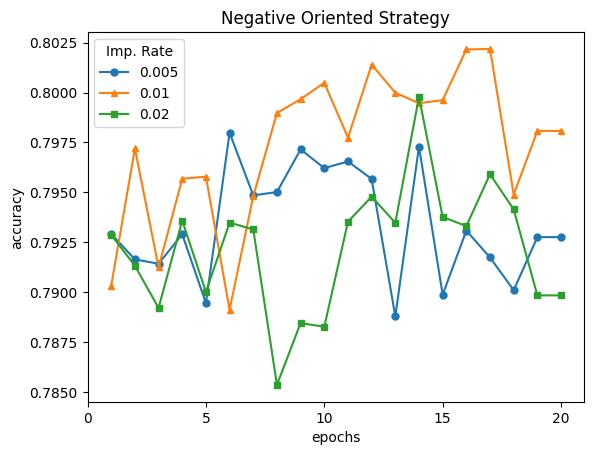

In [ ]:
plot_strategy_for_impr_rates(df_processed, basic_nature=23, strat_name="Negative Oriented")

As we can see, the best improvement rate for this strategy is **0.01**.

Now, let us compare the strategies, with their best fitting improvement rate:

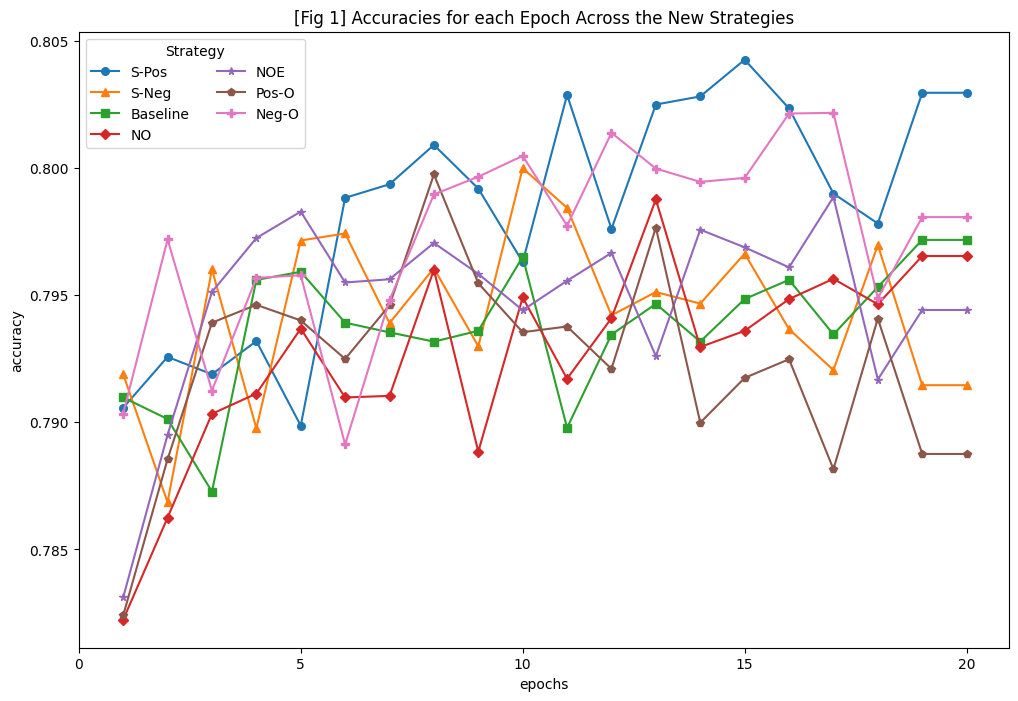

In [ ]:
plt.figure(figsize=(12, 8))
epochs = list(range(1, 21))

bn17_accuracies = df_processed.loc[17, 0.01].values
plt.plot(epochs, bn17_accuracies, label="S-Pos", marker="o", markersize=5.5)

bn18_accuracies = df_processed.loc[18, 0.005].values
plt.plot(epochs, bn18_accuracies, label="S-Neg", marker="^", markersize=5.5)

bn19_accuracies = df_processed.loc[19, 0.005].values
plt.plot(epochs, bn19_accuracies, label="Baseline", marker="s", markersize=5.5)

bn20_accuracies = df_processed.loc[20, 0.005].values
plt.plot(epochs, bn20_accuracies, label="NO", marker="D", markersize=5.5)

bn21_accuracies = df_processed.loc[21, 0.01].values
plt.plot(epochs, bn21_accuracies, label="NOE", marker="*", markersize=5.5)

bn22_accuracies = df_processed.loc[22, 0.005].values
plt.plot(epochs, bn22_accuracies, label="Pos-O", marker="p", markersize=5.5)

bn23_accuracies = df_processed.loc[23, 0.01].values
plt.plot(epochs, bn23_accuracies, label="Neg-O", marker="P", markersize=5.5)

plt.title("[Fig 1] Accuracies for each Epoch Across the New Strategies")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xticks([0, 5, 10, 15, 20])
plt.legend(title="Strategy", ncol=2)
plt.show()

As we can see, the best performing strategy is the **Strictly Positive strategy** (from epoch 6 onwards).

#### **Comparing Our Best Strategy's Results with the Original Ones**

In this section, we would like to compare the results of our best strategy (Strictly Positive) with the ones in the original paper.

First, after extracting the raw sweep results using the Weights & Biases API, let us load the received raw dataset below:


*Note that the raw dataset can be found in the project's GitHub repository using the following [link](https://github.com/dan-israeli/NLP-Course-Project/blob/main/primary%20research/sweeps/results/raw/raw_best_new_strategy_strictly_positive_results.csv).

In [ ]:
df_raw = pd.read_csv("raw_best_new_strategy_strictly_positive_results.csv")

Now, let us process the raw data by averaging the results of each experiment across the different seeds:

In [ ]:
cols_to_select = ["config_seed", "config_architecture", "config_online_simulation_factor"]
for col in df_raw.columns.values:
  if "Test_accuracy_per_mean_user_and_bot" in col:
    cols_to_select.append(col)

# remove epoch 0
cols_to_select.remove("ENV_Test_accuracy_per_mean_user_and_bot_epoch0")

# rename epoch 25
cols_to_select.remove("ENV_Test_accuracy_per_mean_user_and_bot")
cols_to_select.append("ENV_Test_accuracy_per_mean_user_and_bot_epoch25")
df_raw = df_raw.rename(columns={"ENV_Test_accuracy_per_mean_user_and_bot": "ENV_Test_accuracy_per_mean_user_and_bot_epoch25"})

filtered_df = df_raw[cols_to_select]

In [ ]:
# group by and average across the 3 seeds
grouped = filtered_df.groupby(["config_architecture", "config_online_simulation_factor"]).mean().drop("config_seed", axis=1)
grouped = grouped.rename(columns={col_name: int(col_name.split("epoch")[-1]) for col_name in grouped.columns.values})
df_processed = grouped[sorted(list(range(1, 26)))]
df_processed

1         2   \
config_architecture config_online_simulation_factor                       
LSTM                0.0                              0.821179  0.822739   
                    0.5                              0.822766  0.825447   
                    1.0                              0.825255  0.827174   
                    2.0                              0.822316  0.828898   
                    4.0                              0.825200  0.826929   
                    10.0                             0.823713  0.830225   
transformer         0.0                              0.820871  0.824346   
                    0.5                              0.822301  0.822949   
                    1.0                              0.823599  0.824978   
                    2.0                              0.821762  0.823936   
                    4.0                              0.822525  0.822943   
                    10.0                             0.821830  0.825953   

                                                           3         4   \
config_architecture config_online_simulation_factor                       
LSTM                0.0                              0.824671  0.826358   
                    0.5                              0.827406  0.823612   
                    1.0                              0.828163  0.828684   
                    2.0                              0.829562  0.830206   
                    4.0                              0.828650  0.827855   
                    10.0                             0.827063  0.829071   
transformer         0.0                              0.826102  0.825735   
                    0.5                              0.825469  0.826679   
                    1.0                              0.825160  0.822886   
                    2.0                              0.824909  0.825909   
                    4.0                              0.825063  0.825744   
                    10.0                             0.823010  0.825361   

                                                           5         6   \
config_architecture config_online_simulation_factor                       
LSTM                0.0                              0.828560  0.826620   
                    0.5                              0.827952  0.829714   
                    1.0                              0.830459  0.830286   
                    2.0                              0.834054  0.832948   
                    4.0                              0.828152  0.831866   
                    10.0                             0.826735  0.828467   
transformer         0.0                              0.826795  0.824988   
                    0.5                              0.825508  0.824799   
                    1.0                              0.827985  0.828685   
                    2.0                              0.827938  0.828805   
                    4.0                              0.824287  0.825844   
                    10.0                             0.825292  0.826472   

                                                           7         8   \
config_architecture config_online_simulation_factor                       
LSTM                0.0                              0.827237  0.830010   
                    0.5                              0.828000  0.829916   
                    1.0                              0.828721  0.830032   
                    2.0                              0.833153  0.833694   
                    4.0                              0.832058  0.831231   
                    10.0                             0.829205  0.827871   
transformer         0.0                              0.826292  0.827333   
                    0.5                              0.827047  0.823751   
                    1.0                              0.828707  0.827068   
                    2.0                              0.827492  0.829473   
      

##### **Comapring Our strategy's Best Simulation Ratios with the Ones of the Original Papaer**

###### **Finding Our Strategy's Best Simulation Ratio for each Model**

For the best strategy we received, let us compare the results of each of the models (LSTM and Transformer) across different simulation ratios:

In [ ]:
def plot_final_experiment_accuracies(df, arch, simulation_ratio_lst, fig_num):
  plt.figure(figsize=(11, 7))
  epochs = list(range(1, 26))
  marker_lst = ["o", "^", "s", "D", "*", "x"]

  for i, sim_ratio in enumerate(simulation_ratio_lst):
    accuracies = df.loc[arch, sim_ratio].values
    plt.plot(epochs, accuracies, label=sim_ratio, marker=marker_lst[i], markersize=5.5)

  if arch == "transformer":
    arch = "Transformer"

  plt.title(f"[Fig {fig_num}] {arch} Accuracies for each Epoch Across Different Simulation Ratios")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.xticks([0, 5, 10, 15, 20, 25])
  plt.legend(title="Sim. Ratio", ncol=2)
  plt.show()

For the LSTM model:

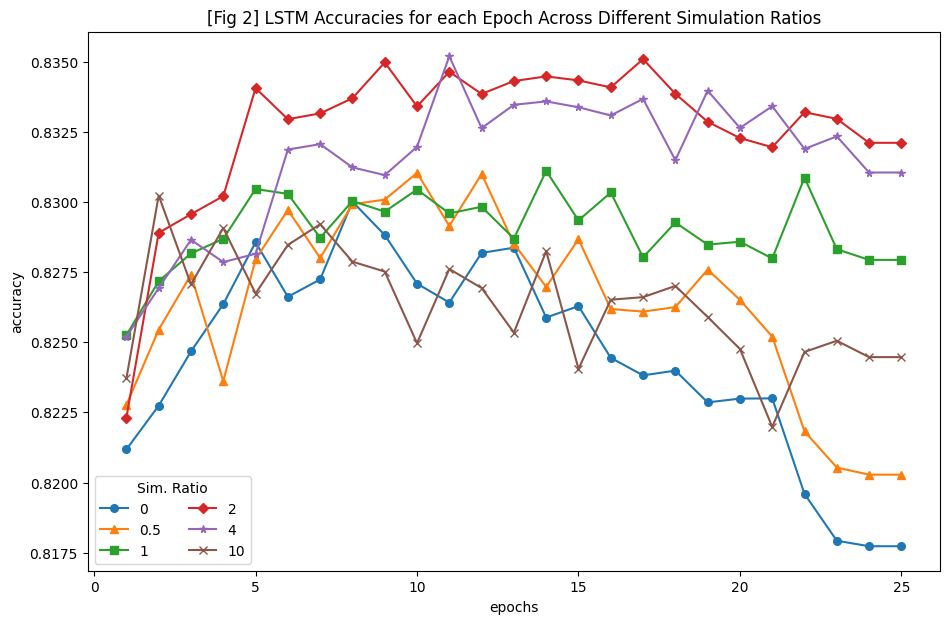

In [ ]:
plot_final_experiment_accuracies(df_processed, "LSTM", [0, 0.5, 1, 2, 4, 10], fig_num="2")

As we can see, the best fitting simulation ratio for this strategy is **2.0**.

For the Transformer model:

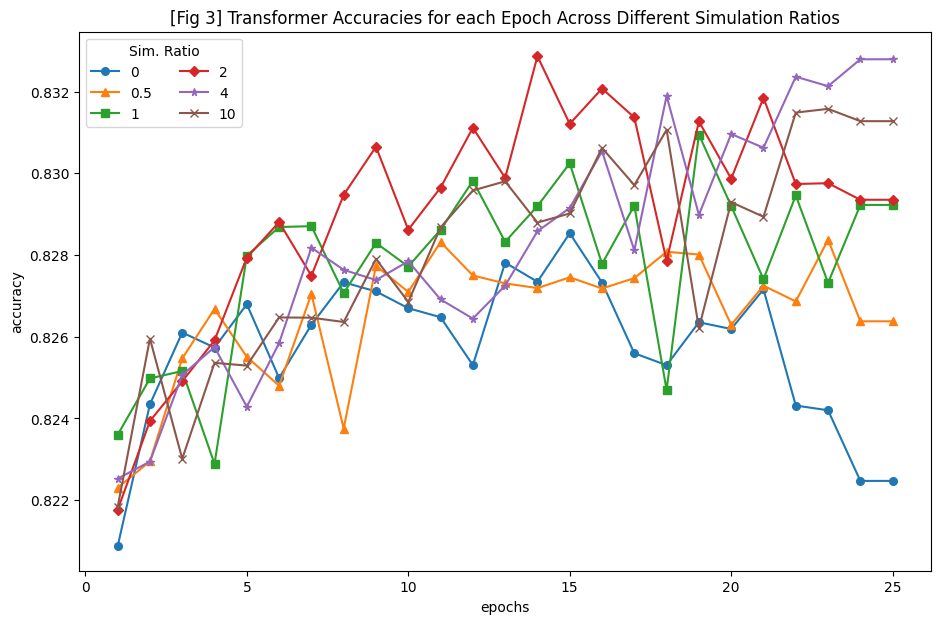

In [ ]:
plot_final_experiment_accuracies(df_processed, "transformer", [0, 0.5, 1, 2, 4, 10], fig_num="3")

From the graph above, we can conclude several insights. On one hand, simulation ratio 2.0 yields the best results during the earlier epochs (up until epoch 20). On the other hand, simulation ratio 4.0 appears to yield the best results in later epochs (epochs 20+). Moreover, the performance in the best epoch for both simulation ratios seems to be very close.

Therefore, in order to determine which simulation ratio fits our strategy best, let us compare the best epoch results for both models:

In [ ]:
best_epoch_sim_ratio2 = df_processed.loc["transformer", 2.0].max()
print(f"Highest accuracy for simulation ratio 2.0: {best_epoch_sim_ratio2:.4f}")

Highest accuracy for simulation ratio 2.0: 0.8329


In [ ]:
best_epoch_sim_ratio4 = df_processed.loc["transformer", 4.0].max()
print(f"Highest accuracy for simulation ratio 4.0: {best_epoch_sim_ratio4:.4f}")

Highest accuracy for simulation ratio 4.0: 0.8328


As we can see, the highest accuracy is received for **simulation ratio 2.0** by a slight margin.

###### **Finding the Best Simulation Ratio for each Model in the Original Paper**

Let us find the best performing simulation ratios in the original paper, for each of the models (LSTM and Transformer).

First, let us load the original paper results below.

*Note that the dataset can be found in the project's GitHub repository using the following [link](https://github.com/dan-israeli/NLP-Course-Project/blob/main/primary%20research/sweeps/results/original_paper_results.csv).

In [ ]:
original_accuracies = pd.read_csv("original_paper_results.csv", index_col=["config_architecture", "config_online_simulation_factor"])

For the LSTM model:

In [ ]:
def plot_original_paper_results(original_accuracies, arch):
  epochs = list(range(1, 26))
  simulation_ratios = [0.5, 1.0, 2.0, 4.0, 10.0, 0.0]
  marker_lst = ["o", "D", "s", "*", "^", "X"]

  plt.figure(figsize=(10, 6))

  for sim_ratio, marker in zip(simulation_ratios, marker_lst):
    accuracies = original_accuracies.loc[arch, sim_ratio]

    plt.plot(epochs, accuracies, label=sim_ratio, marker=marker, markersize=5.5)

  if arch == "transformer":
    arch = "Transformer"

  plt.title(f"Original Paper {arch} Accuracies for each Epoch - Across Different Simulation Ratios")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.xticks([0, 5, 10, 15, 20, 25])
  plt.legend(title="Sim. Ratio")
  plt.show()


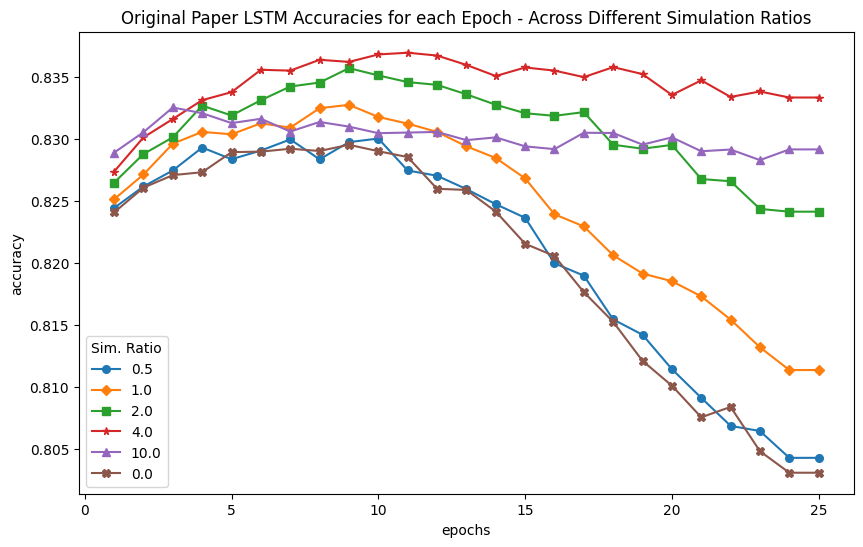

In [ ]:
plot_original_paper_results(original_accuracies, "LSTM")

As we can see, the simulation ratio which yields the best results is **4.0**.

For the Transformer model:

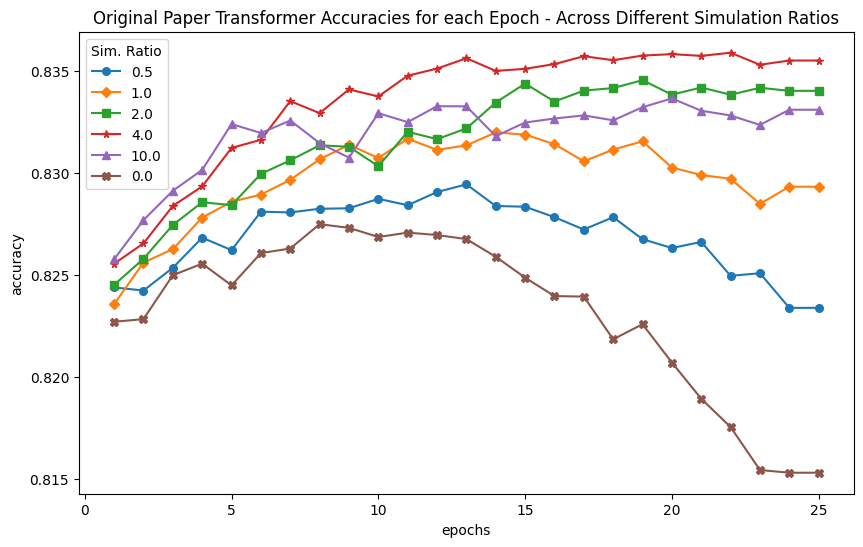

In [ ]:
plot_original_paper_results(original_accuracies, "transformer")

As we can see, the simulation ratio which yields the best results is **4.0**.

###### **Comparing the Results**

As we saw, our strategy's best fitting simulation ratio is 2.0.

Let us find confidence intervals for our best results:

In [ ]:
def bootstrap_ci(data, n_bootstrap=1000, ci=0.95):
    bootstrapped_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_means.append(np.mean(sample))
    lower_bound = np.percentile(bootstrapped_means, (1 - ci) / 2 * 100)
    upper_bound = np.percentile(bootstrapped_means, (1 + ci) / 2 * 100)
    return lower_bound, upper_bound


def get_ci_for_epoch(df, epoch):
  config_cols = [c for c in df.columns if "config_" in c and c!="config_wandb_run_id" and c!="config_online_simulation_size"]
  HPT_cols = [col for col in config_cols if df[col].nunique() > 1]

  # remove non-numeric columns before computing mean and std
  numeric_cols = df.select_dtypes(include=np.number).columns
  df_numeric = df[numeric_cols]

  grouped = df_numeric.groupby([c for c in HPT_cols if c != "config_seed"])

  mean_df = grouped.mean()
  std_df = grouped.std()

  # re-add non-numeric columns before computing best_col
  cols_to_re_add = []
  for col in config_cols:
    if col not in mean_df.columns:
      cols_to_re_add.append(col)

  mean_df[cols_to_re_add] = df[cols_to_re_add]

  best_col = mean_df[[c for c in mean_df.columns if f"{BASE_METRIC}_epoch{epoch}" in c]].idxmax(axis=1)

  result = grouped.apply(lambda x: x[best_col.loc[x.name]].values)
  means = grouped.apply(lambda x: x[best_col.loc[x.name]].mean())
  stds = grouped.apply(lambda x: x[best_col.loc[x.name]].std())

  df_cols = {'mean': means, 'std': stds, 'values': result.values}
  df_cols['epoch'] = best_col.apply(lambda x: int(x.split("epoch")[1]) if "epoch" in x else "last")

  df_cols['CI'] = result.apply(lambda x: bootstrap_ci(x))

  epoch_ci_df = pd.DataFrame(df_cols['CI'])
  epoch_ci_df.rename(columns={0: "CI"}, inplace=True)

  epoch_ci_df[f'CI_lower_epoch{epoch}'] = epoch_ci_df['CI'].apply(lambda x: x[0])
  epoch_ci_df[f'CI_upper_epoch{epoch}'] = epoch_ci_df['CI'].apply(lambda x: x[1])

  epoch_ci_df.drop("CI", axis=1, inplace=True)

  return epoch_ci_df


def get_all_ci(df, num_epochs):
  for epoch in range(1, num_epochs+1):
    epoch_ci_df = get_ci_for_epoch(df, epoch)

    if epoch == 1:
      all_ci_df = epoch_ci_df
    else:
      all_ci_df = pd.concat([all_ci_df, epoch_ci_df], axis=1)

  return all_ci_df

In [ ]:
df_raw_lstm = df_raw[df_raw["config_architecture"] == "LSTM"]
all_ci_lstm = get_all_ci(df_raw_lstm, num_epochs=25).loc[2.0]

In [ ]:
all_ci_lstm = pd.DataFrame(all_ci_lstm).T
all_ci_lstm

,CI_lower_epoch1,CI_upper_epoch1,CI_lower_epoch2,CI_upper_epoch2,CI_lower_epoch3,CI_upper_epoch3,CI_lower_epoch4,CI_upper_epoch4,CI_lower_epoch5,CI_upper_epoch5,...,CI_lower_epoch21,CI_upper_epoch21,CI_lower_epoch22,CI_upper_epoch22,CI_lower_epoch23,CI_upper_epoch23,CI_lower_epoch24,CI_upper_epoch24,CI_lower_epoch25,CI_upper_epoch25
2.0,0.833501,0.836344,0.827876,0.83906,0.828215,0.83062,0.828922,0.831087,0.832688,0.835426,...,0.829221,0.836965,0.827876,0.83906,0.831808,0.834396,0.828898,0.837069,0.828898,0.837069


In [ ]:
df_raw_transformer = df_raw[df_raw["config_architecture"] == "transformer"]
all_ci_transformer = get_all_ci(df_raw_transformer, num_epochs=25).loc[2.0]

In [ ]:
all_ci_transformer = pd.DataFrame(all_ci_transformer).T
all_ci_transformer

,CI_lower_epoch1,CI_upper_epoch1,CI_lower_epoch2,CI_upper_epoch2,CI_lower_epoch3,CI_upper_epoch3,CI_lower_epoch4,CI_upper_epoch4,CI_lower_epoch5,CI_upper_epoch5,...,CI_lower_epoch21,CI_upper_epoch21,CI_lower_epoch22,CI_upper_epoch22,CI_lower_epoch23,CI_upper_epoch23,CI_lower_epoch24,CI_upper_epoch24,CI_lower_epoch25,CI_upper_epoch25
2.0,0.832033,0.834121,0.830787,0.833647,0.820634,0.828296,0.8226,0.829471,0.82413,0.832727,...,0.830787,0.833647,0.828603,0.8304,0.829023,0.831022,0.828791,0.829741,0.828791,0.829741


Now, let us compare our best results with the original paper's best results:

In [ ]:
def compare_best_results(our_results, original_paper_results, arch, ci_df, fig_num):
  epochs = list(range(1, 26))

  our_best_result = our_results.loc[arch, 2.0]
  original_paper_best_result = original_paper_results.loc[arch, 4.0]

  cols = ci_df.columns.values
  ci_df = ci_df[[c for c in cols if "lower" in c] + [c for c in cols if "upper" in c]]

  lowers = ci_df.iloc[:, :len(cols)//2].values[0]
  uppers = ci_df.iloc[:, len(cols)//2:].values[0]

  plt.figure(figsize=(10, 6))
  plt.plot(epochs, our_best_result, label="new")
  plt.plot(epochs, original_paper_best_result, label="original")

  plt.fill_between(epochs, lowers, uppers, label="CI", alpha=0.4)

  if arch == "transformer":
    arch = "Transformer"

  plt.title(f"[Fig {fig_num}] Best Results Comparison - {arch} Model")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.xticks([0, 5, 10, 15, 20, 25])
  plt.legend(loc="lower right")
  plt.show()

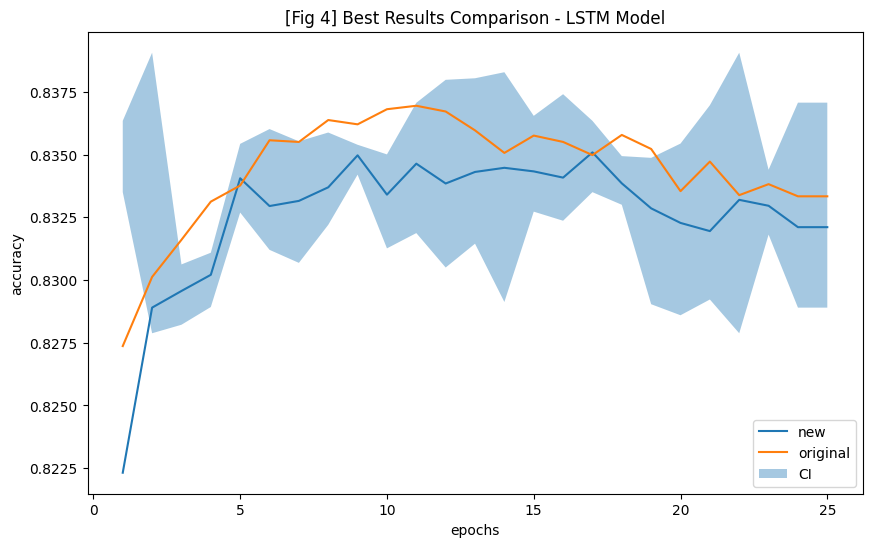

In [ ]:
compare_best_results(df_processed, original_accuracies, "LSTM", all_ci_lstm, fig_num="4")

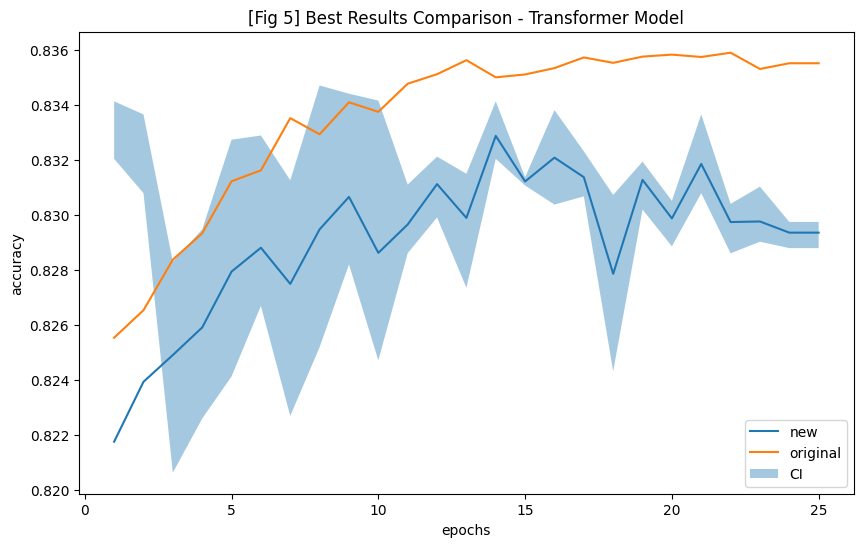

In [ ]:
compare_best_results(df_processed, original_accuracies, "transformer", all_ci_transformer, fig_num="5")

##### **Comparing Our Strategy's Results with the Original Ones for each Model, Across the Different Simulation Ratios**

In [ ]:
def plot_comparison_subplots(original_accuracies, new_accuracies, architecture, fig_num):
  epochs = list(range(1, 26))
  fig, axs = plt.subplots(3, 2, figsize=(12, 12))

  model_in_title = architecture
  if model_in_title == "transformer":
    model_in_title = "Transformer"

  fig.suptitle(f"[Fig {fig_num}] {model_in_title} Original VS New Accuracies across Different Simulation Ratios", fontweight="bold")
  fig.tight_layout(pad=4.0)

  for i, sim_ratio in enumerate([0.0, 0.5, 1.0, 2.0, 4.0, 10.0]):
    original_sim_ratio_accuracies = original_accuracies.loc[architecture, sim_ratio]
    new_sim_ratio_accuracies = new_accuracies.loc[architecture, sim_ratio]

    axs[i//2, i%2].plot(epochs, original_sim_ratio_accuracies, label="original")
    axs[i//2, i%2].plot(epochs, new_sim_ratio_accuracies, label="new")

    axs[i//2, i%2].set_title(f"[Fig {fig_num}.{i+1}] Simulation Ratio {sim_ratio}")
    axs[i//2, i%2].set_xlabel("epochs")
    axs[i//2, i%2].set_ylabel("accuracies")

    axs[i//2, i%2].legend(loc="lower left")

  plt.show()

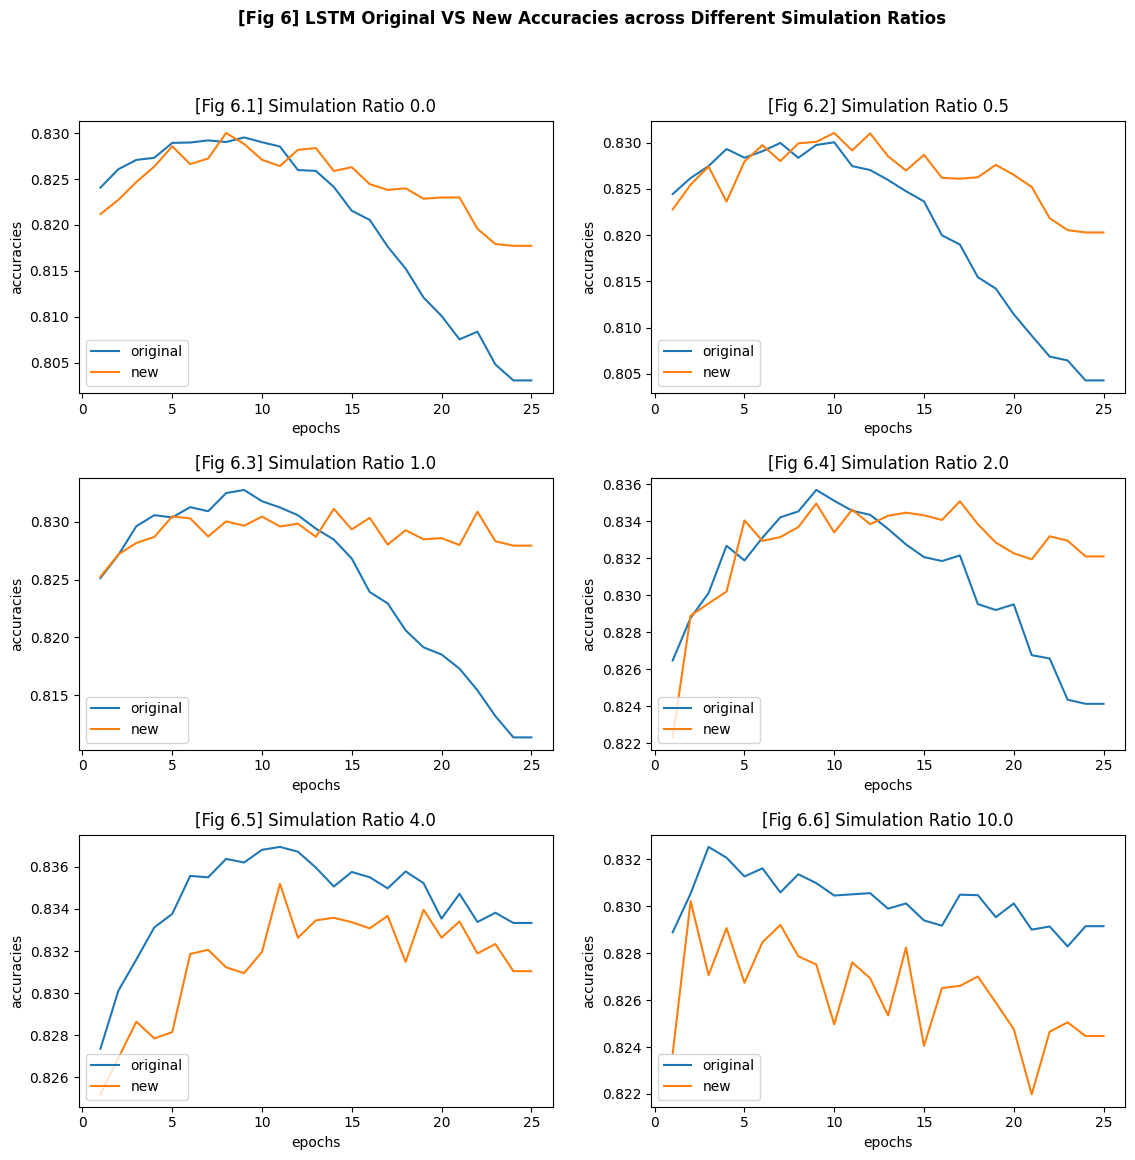

In [ ]:
plot_comparison_subplots(original_accuracies, df_processed, "LSTM", fig_num="6")

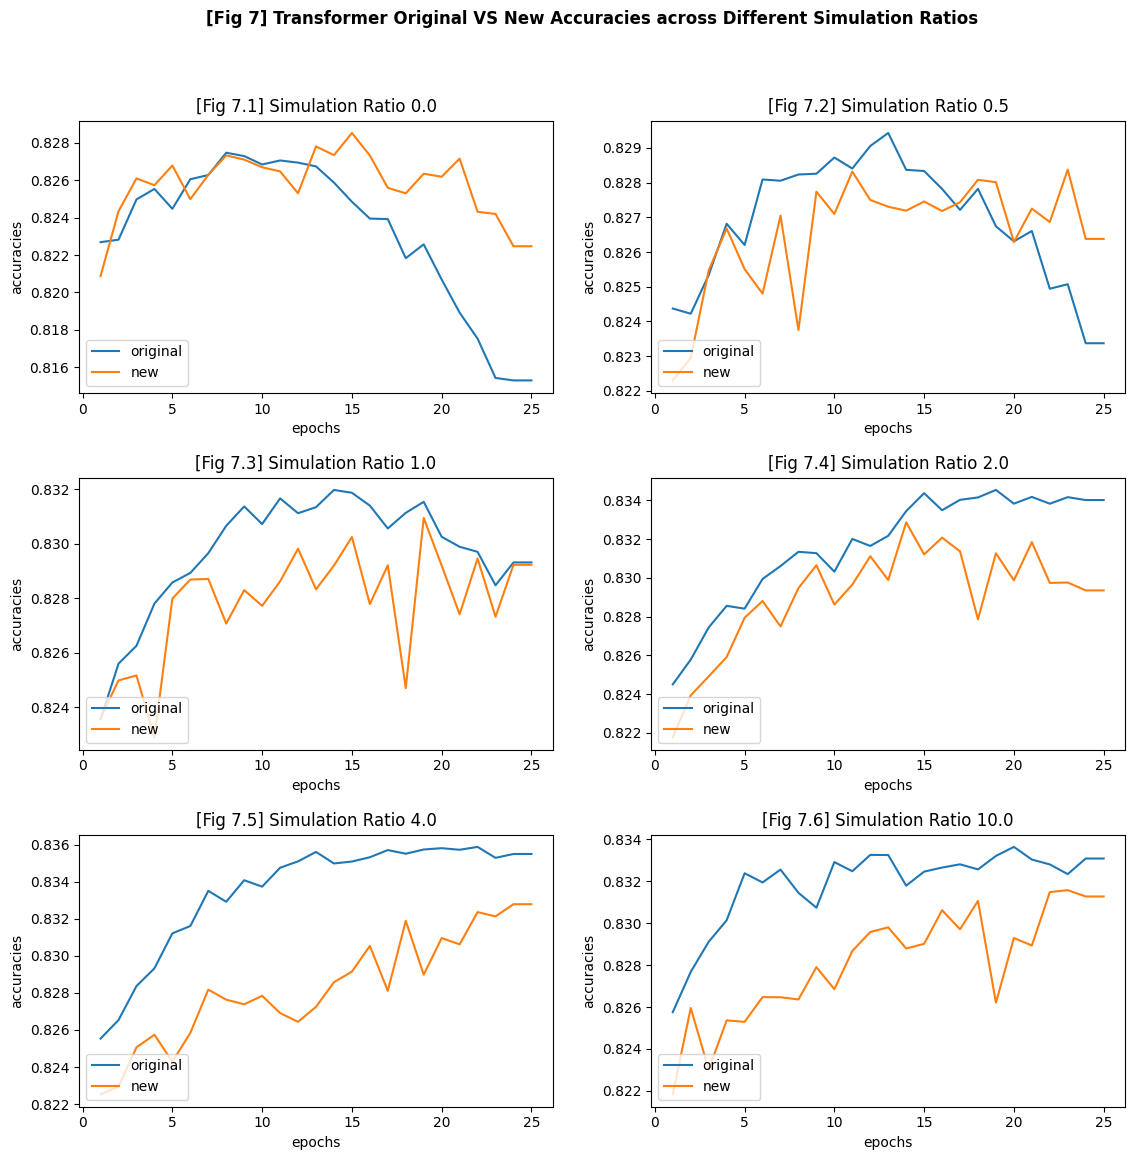

In [ ]:
plot_comparison_subplots(original_accuracies, df_processed, "transformer", fig_num="7")

## **Secondary Research - BERT PCA Experiments**

### **Analysis Results**

### **Creating the PCA Embeddings for the Tested Dimensions**

First, let us create the BERT embeddings for all hotel reviews, using the method from the original paper:

*Note that the hotel reviews dataset can be found in the project's GitHub repository using following [link](https://github.com/dan-israeli/NLP-Course-Project/blob/main/secondary%20research/BERT%20PCA%20embeddings/raw%20hotel%20reviews/all_reviews.csv).

In [ ]:
!pip install -U -qqq sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
sentences_df = pd.read_csv("all_reviews.csv")
sentences_df.fillna(" ", inplace=True)

pos_sentences_col = sentences_df["2"]
neg_sentences_col = sentences_df["3"]

pos_sentences_arr = pos_sentences_col.to_numpy()
neg_sentences_arr = neg_sentences_col.to_numpy()

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

pos_embeddings = model.encode(pos_sentences_arr)
neg_embeddings = model.encode(neg_sentences_arr)

review_embeddings = np.concatenate([pos_embeddings, neg_embeddings], axis=1)

Now, let us find the principal components of the hotel reviews, as well as plot the Elbow graph for the relationship between the explained variance and the PCA dimension:

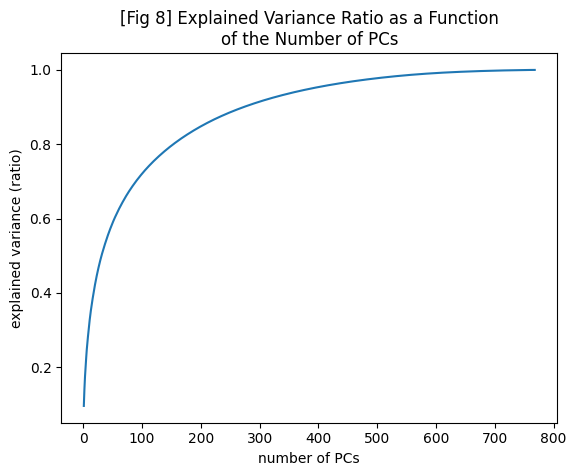

In [ ]:
n_components = review_embeddings.shape[1]

scaler = StandardScaler()
review_embeddings_scaled = scaler.fit_transform(review_embeddings)

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(review_embeddings_scaled)


pc_lst = range(1, n_components+1)
explained_var_lst = [sum(pca.explained_variance_ratio_[:i]) for i in pc_lst]

plt.plot(pc_lst, explained_var_lst)
plt.title("[Fig 8] Explained Variance Ratio as a Function\nof the Number of PCs")
plt.xlabel("number of PCs")
plt.ylabel("explained variance (ratio)");

From the graph above, the range of possible dimensions that we choose to experiment with is between 1 - 250.

In order to obtain a reasonable number of experiments, we choose to test the PCA dimensions from 5, 10, 15, ... 250.

Let us create the PCA embeddings of said dimensions:

In [ ]:
os.mkdir("PCA_csvs")

for num_PCs in range(5, 255, 5):
  principal_df = pd.DataFrame(data=principal_components[:, :num_PCs],
                              columns=[f'pc_{i}' for i in range(1, num_PCs + 1)], index=sentences_df["0"].values)

  principal_df.to_csv(f"PCA_csvs/BERT_PCA_{num_PCs}.csv")

### **PCA Dimension Analysis**

First, let us load the raw results below:

*Note that the dataset can be found in the project's GitHub repository using the following [link](https://github.com/dan-israeli/NLP-Course-Project/blob/main/secondary%20research/sweeps/results/raw/raw_bert_pca_experiment_results.csv).

In [ ]:
pca_data = pd.read_csv("raw_pca_experiment_results.csv")

Now, let us process the raw data by averaging the results of each experiment across the different seeds, and finding the accuracy of the best performing epoch:

In [ ]:
cols_to_select = ["config_seed", "config_features"]

for col in pca_data.columns.values:
  if "Test_accuracy_per_mean_user_and_bot" in col:
    cols_to_select.append(col)

# remove epoch 0
cols_to_select.remove("ENV_Test_accuracy_per_mean_user_and_bot_epoch0")

# rename epoch 20
cols_to_select.remove("ENV_Test_accuracy_per_mean_user_and_bot")
cols_to_select.append("ENV_Test_accuracy_per_mean_user_and_bot_epoch20")
pca_data = pca_data.rename(columns={"ENV_Test_accuracy_per_mean_user_and_bot": "ENV_Test_accuracy_per_mean_user_and_bot_epoch20"})

pca_data = pca_data[cols_to_select]

In [ ]:
# group by and average across the 3 seeds
pca_results = pca_data.groupby(["config_features"]).mean().drop("config_seed", axis=1)

pca_results = pca_results.rename(columns={col_name: int(col_name.split("epoch")[-1]) for col_name in pca_results.columns.values})
pca_results = pca_results[sorted(list(range(1, 21)))]


In [ ]:
pca_results["best_result"] = 0

for idx, row in pca_results.iterrows():
  pca_results.loc[idx, "best_result"] = row.max()

In [ ]:
pca_results.drop([i for i in range(1, 21)], axis=1, inplace=True)

pca_dim_lst = [int(st.split("_")[2]) for st in pca_results.index]
pca_results["pca_dim"] = pca_dim_lst

pca_results.sort_values(by="pca_dim", inplace=True)

pca_results.drop("pca_dim", axis=1, inplace=True)

pca_results.head(10)

,best_result
config_features,
BERT_PCA_5,0.810055
BERT_PCA_10,0.823804
BERT_PCA_15,0.827673
BERT_PCA_20,0.831350
BERT_PCA_25,0.830657
BERT_PCA_30,0.829808
BERT_PCA_35,0.831258
BERT_PCA_40,0.832150
BERT_PCA_45,0.831591


Let us plot the model's accuracy as a function of the PCA dimension:

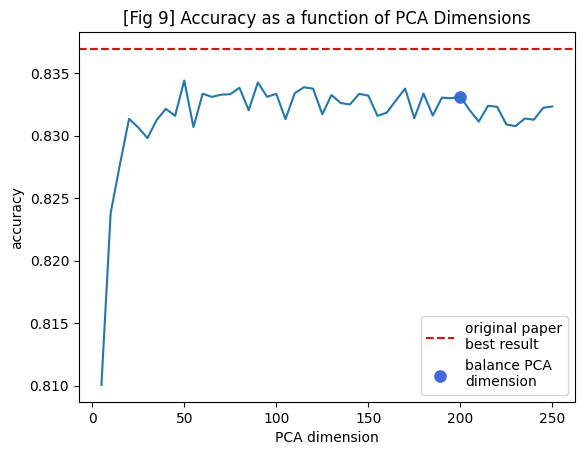

In [ ]:
original_paper_best_result = 0.836946

pca_dim = list(range(5, 255, 5))
plt.plot(pca_dim, pca_results["best_result"])

plt.axhline(y=original_paper_best_result, color='r', linestyle='--', label="original paper\nbest result")
plt.scatter([200], [pca_results.loc["BERT_PCA_200"]], color="royalblue", label='balance PCA\ndimension', s=65)

plt.title("[Fig 9] Accuracy as a function of PCA Dimensions")
plt.xlabel("PCA dimension")
plt.ylabel("accuracy")
plt.legend()
plt.show()